#Introduction to Deep Learning 2023-2
## Cardiac Arrhythmia challenge

Steps to run notebook:
1. Create a copy of this folder in your drive
2. Run the first code block
3. Change 'data_path' to the location of the folder (open folder icon on the left, navigate to this folder, click the 3 dots on the right of the folder to copy path to the folder)







In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
# PATH TO THIS FOLDER IN DRIVE
data_path = "/content/gdrive/MyDrive/DeepLearning/Electrocardiograma_2023_2"

In [3]:
#data libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py

#model libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import utils                                   # tools for creating one-hot encoding
from keras.models import Sequential                        # Type of model we wish to use

# Extracting the Training Data
The training data is saved in the file 'training_set_500.h5', which is in [h5
format](https://fileinfo.com/extension/h5).  This format allows to save Hierarchical Data.  In this file we have saved the 'data' and the 'labels'

We extract the 'data' and the 'labels' to the variables X_train and y_train respectively and then convert these variable into numpy arrays.

**The dataset has 3 labels :**

*   0: Normal
*   1: Arrhythmia
*   2: Noise




In [4]:
# Traing Data - ECG signals from 500 patients
dataset = h5py.File(data_path + '/training_set_500.h5', 'r')

X_train = dataset.get('data')
X_train = np.array(X_train)
y_train = dataset.get('labels')
y_train = np.array(y_train)
dataset.close()

# Healthy assertion
assert X_train.shape == (116953, 2049, 1)  # The training data has 116953 1D ECG signals each one with 2049 samples
assert y_train.shape == (116953, 1) # 116953 labels (0: Normal, 1: Cardiac Arrhytmia, 2: Noise signal)

## Converting the y_train to one-hot encoding

In [5]:
nclases = 3
y_train = utils.to_categorical(y_train,nclases)

print("y_train= ", y_train[0])
# Healthy assertion
assert y_train.shape == (116953, 3) # 116953 labels ([1. 0. 0.]: Normal, [0. 1. 0.]: Cardiac Arrhytmia, [0. 0. 1.]: Noise signal)

y_train=  [1. 0. 0.]


# Extracting the Test Data
The test data is saved in the file '/test_without_labels_200.h5', which is also in [h5
format](https://fileinfo.com/extension/h5).  
We extract the 'data' to the variable X_test. **Please note that the test labels  are hidden for challenge purposes.**

In [ ]:
# Testing Data - ECG signals from 200 patients
dataset = h5py.File(data_path + '/test_without_labels_200.h5', 'r')

X_test = dataset.get('data')
X_test = np.array(X_test)
dataset.close()

# Healthy assertion
assert X_test.shape == (46943, 2049, 1) # 46943 1D ECG signal each one with 2049 samples

## Sketching some ECG Signal

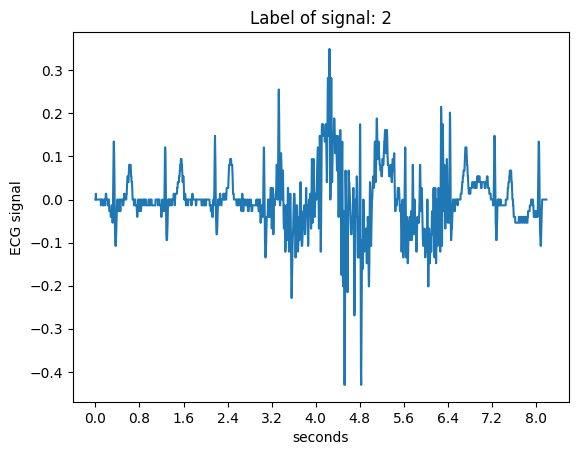

In [6]:

index = 763

x=np.arange(0,2048,200)
xi = x/250 # sample rate of recording: 250Hz
plt.xticks(x,xi)
plt.plot(X_train[index])
plt.title('Label of signal: %i'  % np.argmax(y_train[index]))
plt.xlabel('seconds')
plt.ylabel('ECG signal')

plt.show()

#Model

In [7]:
# MODEL copy + paste from Keras.io

def build_cnn(input_shape):
  """Construir una red neuronal convolucional 1D para clasificar señales cardiacas."""

  model = tf.keras.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  return model


model = build_cnn((2049, 1))

In [8]:
# COMPILE
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
# FIT
model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose = 1)

Epoch 1/10
2924/2924 [==============================] - 33s 8ms/step - loss: 0.4145 - accuracy: 0.8410 - val_loss: 0.4181 - val_accuracy: 0.8516
Epoch 2/10
2924/2924 [==============================] - 22s 8ms/step - loss: 0.3086 - accuracy: 0.8785 - val_loss: 0.4509 - val_accuracy: 0.8474
Epoch 3/10
2924/2924 [==============================] - 22s 8ms/step - loss: 0.2377 - accuracy: 0.9065 - val_loss: 0.5021 - val_accuracy: 0.8510
Epoch 4/10
2924/2924 [==============================] - 23s 8ms/step - loss: 0.1671 - accuracy: 0.9358 - val_loss: 0.6075 - val_accuracy: 0.8466
Epoch 5/10
2924/2924 [==============================] - 23s 8ms/step - loss: 0.1048 - accuracy: 0.9610 - val_loss: 0.8122 - val_accuracy: 0.8412
Epoch 6/10
2924/2924 [==============================] - 23s 8ms/step - loss: 0.0625 - accuracy: 0.9773 - val_loss: 0.9984 - val_accuracy: 0.8378
Epoch 7/10
2924/2924 [==============================] - 22s 8ms/step - loss: 0.0407 - accuracy: 0.9859 - val_loss: 1.1947 - val_ac

# Calculate the predictions on the X_test, save and submit the results

When you are satisfied with your results:

*   Calculate y_pred, which is the prediction for the X_test
*   Save it on a .npy file
*   Submit your results on the Classroom

I will sent you the F1 score on this file.

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)
assert y_pred.shape == (46943,3)

In [ ]:
#FILE FOR SUBMISSION
np.save(data_path + '/Carlos_Fajardo_prediction',y_pred)

**Do not edit the code below, it is for testing results**

In [ ]:
# dataset_test = h5py.File(data_path + '/test_with_labels_200.h5', 'r')
# y_test = dataset_test.get('labels')
# y_test = np.array(y_test)
# assert y_test.shape == (46943, 1)

# from sklearn.metrics import accuracy_score
# y_predictions = np.zeros(shape=(y_pred.shape[0], 1))

# for i in range(y_pred.shape[0]):
#   y_predictions[i] = np.asarray(np.where(y_pred[i] == 1))

# test_accuracy = accuracy_score(y_test, y_predictions)
# print(test_accuracy)